# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [73]:
#do it once
#then do it for 3 cities - make sure its works
#add time sleep because API only allows 60 calls/minute
#then do it for all cities

lat = []
lng = []
humid = []
cloud = []
wind = []
temp_max = []
date = []
county = []

x = 1
y = 1
print(f"Beginning Data Retrieval")
for city in cities[:10]:
    print(f"Processing Record {x} of Set {y} | {city}")
    url = "http://api.openweathermap.org/data/2.5/weather?"
    city = city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    try:
        response = requests.get(query_url).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response ['clouds']['all'])
        date.append(response['dt'])
        wind = response['wind']['speed']
        country = response['sys']['country']
    except KeyError:
        print(f"There was a Key Error")
    x += 1
    if x % 60 == 0:
        time.sleep(60)
        y +=1
    

Beginning Data Retrieval
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | bisho
Processing Record 3 of Set 1 | attawapiskat
There was a Key Error
Processing Record 4 of Set 1 | kavieng
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | mys shmidta
There was a Key Error
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | los llanos de aridane
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | arlit


In [54]:
#do it once
#then do it for 3 cities - make sure its works
# #add time sleep because API only allows 60 calls/minute
# #then do it for all cities

# weather = []

# x = 1
# y = 1
# print(f"Beginning Data Retrieval")
# for city in cities[:10]:
#     print(f"Processing Record {x} of Set {y} | {city}")
#     url = "http://api.openweathermap.org/data/2.5/weather?"
#     city = city
#     query_url = url + "appid=" + weather_api_key + "&q=" + city
#     try:
#         response = requests.get(query_url).json()
#         lat = response['coord']['lat']
#         lng = response['coord']['lon']
#         temp_max = response['main']['temp_max']
#         humid = response['main']['humidity']
#         cloud = response ['clouds']['all']
#         date = response['dt']
#         wind = response['wind']['speed']
#         country = response['sys']['country']
#         dict = {'City': city,'Lat': lat, 'Lng': lng, 'Max Temp': temp_max, 'Humidity' : humid, 'Cloudiness' : cloud, 'Date':date, \
#                 'Wind Speed' : wind, 'Country':country}
#         weather.append(dict)
#     except KeyError:
#         print(f"There was a Key Error")
#     x += 1
#     if x % 60 == 0:
#         time.sleep(60)
#         y +=1
    

Beginning Data Retrieval
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | bisho
Processing Record 3 of Set 1 | attawapiskat
There was a Key Error
Processing Record 4 of Set 1 | kavieng
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | mys shmidta
There was a Key Error
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | los llanos de aridane
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | arlit


In [74]:
print(lat)
print(lng)
print(humid)
print(cloud)
print(wind)
print(temp_max)
print(date)
print(country)


[-54.8, -32.8472, -2.5744, -23.1203, 38.5167, 28.6585, -34.5322, 18.7369]
[-68.3, 27.4422, 150.7967, -134.9692, -28.7, -17.9182, 20.0403, 7.3853]
[57, 94, 79, 74, 77, 73, 82, 6]
[20, 0, 100, 93, 75, 75, 22, 77]
0.65
[283.15, 289.15, 299.93, 298.74, 290.15, 295.15, 290.15, 314.88]
[1620664483, 1620664484, 1620664484, 1620664484, 1620664485, 1620664485, 1620664485, 1620664485]
NE


In [75]:
print(weather)

[{'City': 'ushuaia', 'Lat': -54.8, 'Lng': -68.3, 'Max Temp': 282.15, 'Humidity': 57, 'Cloudiness': 20, 'Date': 1620660018, 'Wind Speed': 3.09, 'Country': 'AR'}, {'City': 'bisho', 'Lat': -32.8472, 'Lng': 27.4422, 'Max Temp': 291.15, 'Humidity': 82, 'Cloudiness': 20, 'Date': 1620660090, 'Wind Speed': 5.66, 'Country': 'ZA'}, {'City': 'kavieng', 'Lat': -2.5744, 'Lng': 150.7967, 'Max Temp': 300.19, 'Humidity': 78, 'Cloudiness': 100, 'Date': 1620660090, 'Wind Speed': 3.53, 'Country': 'PG'}, {'City': 'rikitea', 'Lat': -23.1203, 'Lng': -134.9692, 'Max Temp': 298.46, 'Humidity': 76, 'Cloudiness': 88, 'Date': 1620659879, 'Wind Speed': 10.25, 'Country': 'PF'}, {'City': 'ribeira grande', 'Lat': 38.5167, 'Lng': -28.7, 'Max Temp': 291.15, 'Humidity': 72, 'Cloudiness': 75, 'Date': 1620660090, 'Wind Speed': 4.12, 'Country': 'PT'}, {'City': 'los llanos de aridane', 'Lat': 28.6585, 'Lng': -17.9182, 'Max Temp': 296.15, 'Humidity': 68, 'Cloudiness': 75, 'Date': 1620660091, 'Wind Speed': 4.63, 'Country': '

In [12]:
#Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city

# Get weather data
response = requests.get(query_url).json()
lat = response['coord']['lat']
lng = response['coord']['lon']
temp_max = response['main']['temp_max']
humid = response['main']['humidity']
cloud = response ['clouds']['all']
date = response['dt']
wind = response['wind']['speed']
country = response['sys']['country']

# Get the temperature from the response
pprint(f"{weather_json}")

print(f"the lat is {lat}, long is {lng}, max temp is {temp_max}, humidity is {humid}, cloudiness is {cloud}, date is {date}, \
wind is {wind}, country is {country}.")


("{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 500, 'main': "
 "'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', "
 "'main': {'temp': 286.15, 'feels_like': 285.65, 'temp_min': 285.37, "
 "'temp_max': 287.15, 'pressure': 996, 'humidity': 82}, 'visibility': 10000, "
 "'wind': {'speed': 3.6, 'deg': 220}, 'rain': {'1h': 1}, 'clouds': {'all': "
 "90}, 'dt': 1620606757, 'sys': {'type': 1, 'id': 1414, 'country': 'GB', "
 "'sunrise': 1620620177, 'sunset': 1620675455}, 'timezone': 3600, 'id': "
 "2643743, 'name': 'London', 'cod': 200}")
the lat is 51.5085, long is -0.1257, max temp is 287.15, humidity is 82, cloudiness is 90, date is 1620608055, wind is 3.6, country is GB.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [76]:
weather_df = pd.DataFrame(weather)
weather_df.to_csv('weather_test_output', index = False)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Date,Wind Speed,Country
0,ushuaia,-54.8000,-68.3000,282.15,57,20,1620660018,3.09,AR
1,bisho,-32.8472,27.4422,291.15,82,20,1620660090,5.66,ZA
2,kavieng,-2.5744,150.7967,300.19,78,100,1620660090,3.53,PG
3,rikitea,-23.1203,-134.9692,298.46,76,88,1620659879,10.25,PF
4,ribeira grande,38.5167,-28.7000,291.15,72,75,1620660090,4.12,PT
5,los llanos de aridane,28.6585,-17.9182,296.15,68,75,1620660091,4.63,ES
6,bredasdorp,-34.5322,20.0403,293.15,73,36,1620660091,4.12,ZA
7,arlit,18.7369,7.3853,315.82,6,64,1620660091,1.37,NE


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
# weather_columns = weather_df.columns
# weather_stat = []
# for columns in weather_columns:
#     stat = weather_df.agg({columns: ["mean", "median", "sem", "var", "std"]})
#     weather_stat.append(stat)

# weather_stat
# aggr = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "sem", "var", "std"]})

# aggr.columns = ["Tumor Vol Mean", "Tumor Vol Median", "Tumor Vol SEM", "Tumor Vol Variance", "Tumor Vol Standard Deviation"]


In [59]:
stat = weather_df.agg({"Lat": ["count","mean", "median", "sem", "var", "std", "max", "quantile"]})
stat
# weather_df['Lat']

,Lat
count,8.000000
mean,-7.745250
median,-12.847350
sem,11.946034
var,1141.661891
std,33.788488
max,38.516700
quantile,-12.847350


In [31]:
#  Get the indices of cities that have humidity over 100%.
humid_over100 = weather_df.loc[weather_df["Humidity"]>100]
humid_over100

,Lat,Lng,Max Temp,Humidity,Cloudiness,Date,Wind Speed,Country


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

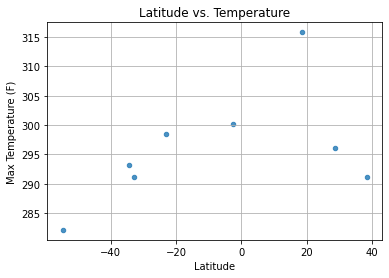

In [77]:
weather_df.plot(x ='Lat', y='Max Temp', kind = 'scatter', grid = True, alpha = .8)
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

In [78]:
weather_df



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Date,Wind Speed,Country
0,ushuaia,-54.8000,-68.3000,282.15,57,20,1620660018,3.09,AR
1,bisho,-32.8472,27.4422,291.15,82,20,1620660090,5.66,ZA
2,kavieng,-2.5744,150.7967,300.19,78,100,1620660090,3.53,PG
3,rikitea,-23.1203,-134.9692,298.46,76,88,1620659879,10.25,PF
4,ribeira grande,38.5167,-28.7000,291.15,72,75,1620660090,4.12,PT
5,los llanos de aridane,28.6585,-17.9182,296.15,68,75,1620660091,4.63,ES
6,bredasdorp,-34.5322,20.0403,293.15,73,36,1620660091,4.12,ZA
7,arlit,18.7369,7.3853,315.82,6,64,1620660091,1.37,NE


## Latitude vs. Humidity Plot

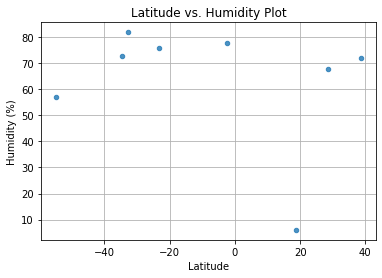

In [79]:
weather_df.plot(x ='Lat', y='Humidity', kind = 'scatter', grid = True, alpha = .8)
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

## Latitude vs. Cloudiness Plot

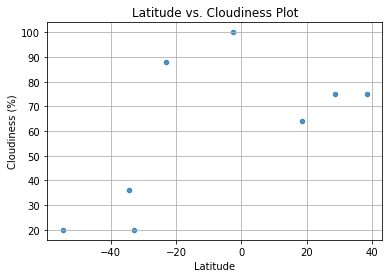

In [80]:
weather_df.plot(x ='Lat', y='Cloudiness', kind = 'scatter', grid = True, alpha = .8)
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

## Latitude vs. Wind Speed Plot

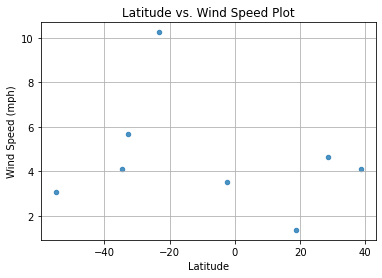

In [81]:
weather_df.plot(x ='Lat', y='Wind Speed', kind = 'scatter', grid = True, alpha = .8)
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

## Linear Regression

In [122]:
n_hem = weather_df.loc[weather_df["Lat"] >= 0, 'Lat']
s_hem = weather_df.loc[weather_df["Lat"] < 0, 'Lat']
n_hem_temp =  weather_df.loc[weather_df["Lat"] >= 0,'Max Temp']
s_hem_temp =  weather_df.loc[weather_df["Lat"] < 0,'Max Temp']
n_hem_hum =  weather_df.loc[weather_df["Lat"] >= 0,'Humidity']
s_hem_hum =  weather_df.loc[weather_df["Lat"] < 0,'Humidity']
n_hem_cloud =  weather_df.loc[weather_df["Lat"] >= 0,'Cloudiness']
s_hem_cloud =  weather_df.loc[weather_df["Lat"] < 0,'Cloudiness']
n_hem_wind =  weather_df.loc[weather_df["Lat"] >= 0,'Wind Speed']
s_hem_wind =  weather_df.loc[weather_df["Lat"] < 0,'Wind Speed']



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

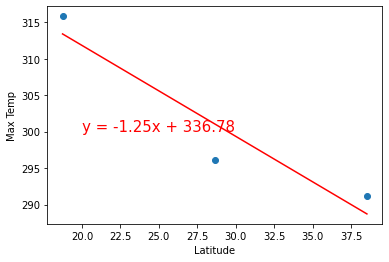

the r-value is -0.9464105674393782


In [101]:
x_values = n_hem
y_values = n_hem_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,300),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"the r-value is {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

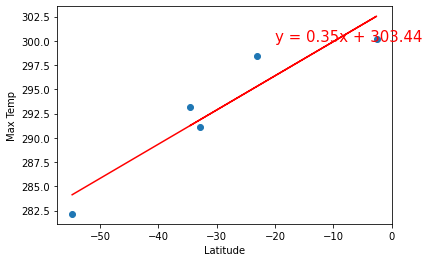

the r-value is 0.9402955281211606


In [118]:
x_values = s_hem
y_values = s_hem_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,300),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"the r-value is {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

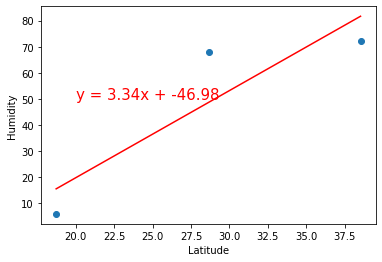

the r-value is 0.8926191175940863


In [108]:
x_values = n_hem
y_values = n_hem_hum
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"the r-value is {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

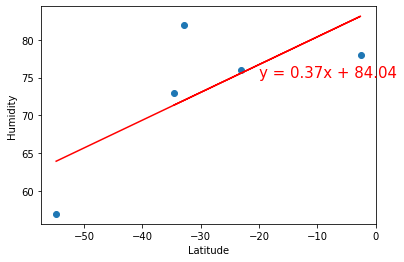

the r-value is 0.7227112457764242


In [117]:
x_values = s_hem
y_values = s_hem_hum
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,75),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"the r-value is {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

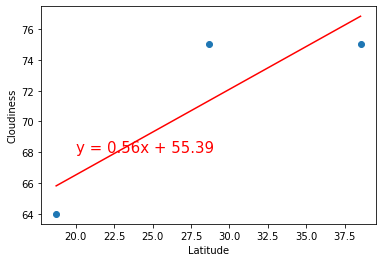

the r-value is 0.8669492068892852


In [115]:
x_values = n_hem
y_values = n_hem_cloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,68),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"the r-value is {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

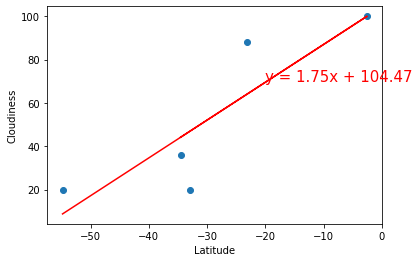

the r-value is 0.8636856650379059


In [120]:
x_values = s_hem
y_values = s_hem_cloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"the r-value is {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

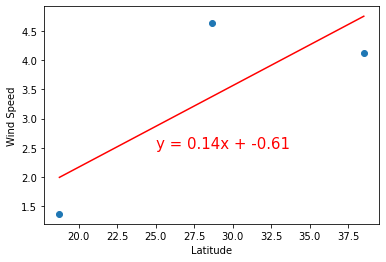

the r-value is 0.7852585887753768


In [126]:
x_values = n_hem
y_values = n_hem_wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25, 2.5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"the r-value is {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

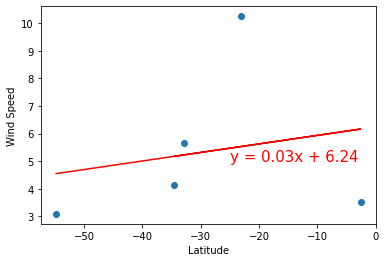

the r-value is 0.20119850405584846


In [128]:
x_values = s_hem
y_values = s_hem_wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25, 5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"the r-value is {rvalue}")